In [27]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss
from sklearn.ensemble import (RandomForestClassifier, 
                              GradientBoostingClassifier, 
                              AdaBoostClassifier)
import seaborn as sns
sns.set(style="ticks", color_codes=True)
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
#Read in data
conversion_data = pd.read_csv('data/conversion_data.csv')
#Separate labels from data
X = conversion_data.iloc[:,:5]
y = conversion_data.pop('converted')

In [3]:
def dummify_cats(df, column_name):
    new_cats = list(df[column_name].unique())
    for i, cat in enumerate(new_cats):
        df['is_' + new_cats[i]] = (df[column_name]==cat).astype(int)
    df.drop([column_name], axis=1, inplace=True)

In [5]:
#Dummify categorical features
X_dummied = X.copy()
dummify_cats(X_dummied, 'country')
dummify_cats(X_dummied, 'source')

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_dummied, y, test_size=0.2, random_state=20)

### Visualize data

In [21]:
X_dummied.head()

,age,new_user,total_pages_visited,is_UK,is_US,is_China,is_Germany,is_Ads,is_Seo,is_Direct
0,25,1,1,1,0,0,0,1,0,0
1,23,1,5,0,1,0,0,0,1,0
2,28,1,4,0,1,0,0,0,1,0
3,39,1,5,0,0,1,0,0,1,0
4,30,1,6,0,1,0,0,0,1,0


In [24]:
X_dummied.shape

(316200, 10)

In [23]:
y.shape

(316200,)

In [33]:
full_df = pd.concat([conversion_data, y], axis=1)
full_df.head()

,country,age,new_user,source,total_pages_visited,converted
0,UK,25,1,Ads,1,0
1,US,23,1,Seo,5,0
2,US,28,1,Seo,4,0
3,China,39,1,Seo,5,0
4,US,30,1,Seo,6,0


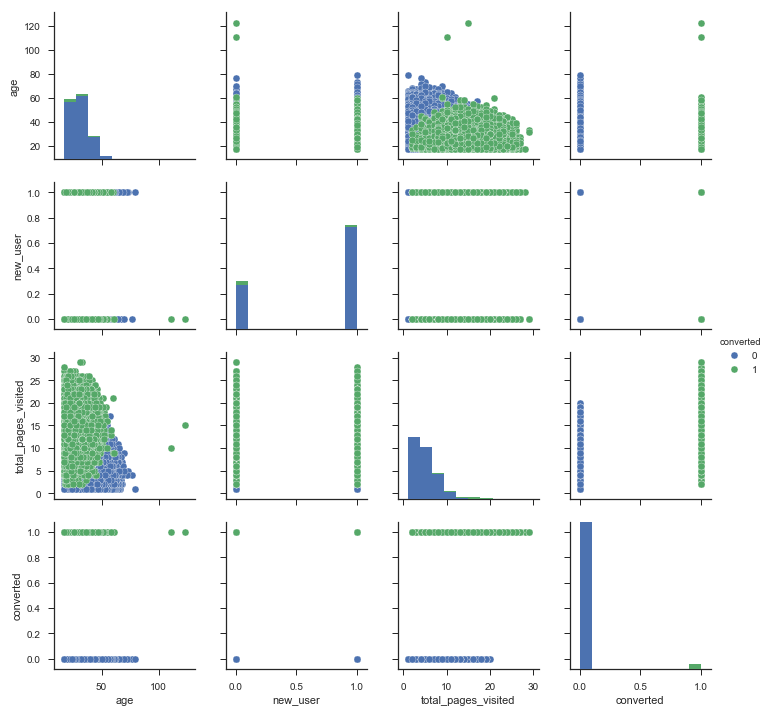

In [35]:
sns.pairplot(full_df, hue='converted')

### Logistic Regression

In [11]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_y_preds = lr.predict(X_test)
lr_logloss = log_loss(y_test, lr_y_preds) 
print(f"log loss for logistic regression model was {lr_logloss}") 

log loss for logistic regression model was 0.4675107732295561


In [47]:
X_train.head()

,age,new_user,total_pages_visited,is_UK,is_US,is_China,is_Germany,is_Ads,is_Seo,is_Direct
164479,21,1,7,0,1,0,0,0,0,1
181528,49,1,6,0,1,0,0,0,1,0
58517,32,1,4,1,0,0,0,0,1,0
206367,28,1,18,0,1,0,0,0,0,1
66834,29,1,6,0,1,0,0,0,0,1


In [46]:
lr.coef_

array([[-0.07250843, -1.73467007,  0.75709738, -0.32454703, -0.69705858,
        -3.79543019, -0.0536362 , -1.56923038, -1.5954007 , -1.70604092]])

### Random Forest Classifier

In [13]:
rfc = RandomForestClassifier(n_estimators=100, max_depth=4, random_state=20)
rfc.fit(X_train, y_train)
random_forest_preds = rfc.predict(X_test)
print(f"log loss for random forest = {log_loss(y_test, random_forest_preds)}")

log loss for random forest = 0.48498699187568284


In [50]:
rfc.feature_importances_

array([  2.21885937e-02,   5.19974989e-02,   8.80311995e-01,
         4.29956992e-03,   4.65838760e-03,   3.48969786e-02,
         1.25807109e-03,   4.44999766e-05,   7.35234468e-05,
         2.70882031e-04])

### Gradient Boosting Classifier

In [14]:
N_ESTIMATORS = 1000
gbc = GradientBoostingClassifier(learning_rate=0.01, n_estimators=N_ESTIMATORS)
gbc.fit(X_train, y_train)
gbc_preds = gbc.predict(X_test)
print(f"log loss for gradient boosting = {log_loss(y_test, gbc_preds)}")

log loss for gradient boosting = 0.4664185917492349


### ADA Boosting Classifier

In [45]:
N_ESTIMATORS = 1000
abc = AdaBoostClassifier(learning_rate=0.01, n_estimators=N_ESTIMATORS)
abc.fit(X_train, y_train)
abc_preds = abc.predict(X_test)
print(f"log loss for ADA boosting = {log_loss(y_test, abc_preds)}")

log loss for ADA boosting = 0.4773410640329408


In [60]:
features = np.array(X_train.columns)

In [61]:
importances = np.array(abc.feature_importances_)

In [77]:
feat_imp = np.concatenate([features, importances])
feat_imp.reshape(2, 10)

array([['age', 'new_user', 'total_pages_visited', 'is_UK', 'is_US',
        'is_China', 'is_Germany', 'is_Ads', 'is_Seo', 'is_Direct'],
       [0.16, 0.162, 0.52, 0.0, 0.0, 0.158, 0.0, 0.0, 0.0, 0.0]], dtype=object)

In [86]:
feature_importances = pd.DataFrame(feat_imp.reshape(2, 10))
feature_importances.columns = feature_importances.iloc[0]
feature_importances.drop(index=0, inplace=True)
feature_importances

,age,new_user,total_pages_visited,is_UK,is_US,is_China,is_Germany,is_Ads,is_Seo,is_Direct
1,0.16,0.162,0.52,0,0,0.158,0,0,0,0


In [44]:
full_df[full_df['total_pages_visited'] >= 20]

,country,age,new_user,source,total_pages_visited,converted
213,US,17,0,Seo,21,1
417,UK,19,1,Seo,23,1
1104,US,17,0,Direct,25,1
1122,UK,34,0,Seo,21,1
1305,US,25,0,Direct,26,1
1331,US,32,1,Ads,25,1
1404,US,44,1,Direct,20,1
1420,US,29,0,Direct,20,1
1724,Germany,17,1,Direct,20,1
1788,UK,31,1,Ads,20,1
